##PRIMER EJERCICIO

In [10]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
data=datasets.load_iris()
X=data.data
y=data.target

Primero se empleara un algoritmo de árboles de decisiones

In [11]:
##se clafifica los datos en entrenamiento y en el test
Xtrain, Xtest, ytrain, ytest=tts(X,y,test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier as DTC
modelDTC=DTC()
modelDTC.fit(Xtrain, ytrain)
y_pr_train_DTC= modelDTC.predict(Xtrain) 
y_pr_test_DTC= modelDTC.predict(Xtest)

results_DTC_train=classification_report(ytrain,y_pr_train_DTC)
results_DTC_test = classification_report(ytest,y_pr_test_DTC)

print('              RESULTADO DE LAS MÉTRICAS PARA ARBOL DE DECISIONES')
print('Los resultados para el en entrenamiento son :')
print(results_DTC_train)
print('_'*60)
print('Los resultados para testeo son :    ')
print(results_DTC_test)
print('_'*60)
print('matriz de confusión para el testeo')
print(confusion_matrix(ytest,y_pr_test_DTC))
print('_'*60)
print('matriz de confusión para el entrenamiento')
print(confusion_matrix(ytrain,y_pr_train_DTC))

              RESULTADO DE LAS MÉTRICAS PARA ARBOL DE DECISIONES
Los resultados para el en entrenamiento son :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

____________________________________________________________
Los resultados para testeo son :    
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

_____________________________

In [15]:
##luego se emplea el algoritmo de random forest

from sklearn.ensemble import RandomForestClassifier as RFC
Xtrain1, Xtest1, ytrain1, ytest1=tts(X,y,test_size=0.3)
modelRFC = RFC(n_estimators=200)
modelRFC.fit(Xtrain1,ytrain1)
y_pr_train_RFC= modelRFC.predict(Xtrain1) 
y_pr_test_RFC= modelRFC.predict(Xtest1)
results_RFC_train= classification_report(ytrain1,y_pr_train_RFC)
results_RFC_test = classification_report(ytest1,y_pr_test_RFC)

print('              RESULTADO DE LAS MÉTRICAS PARA RANDOM FOREST')
print('Los resultados para el en entrenamiento son :')
print(results_RFC_train)
print('_'*60)
print('Los resultados para testeo son :    ')
print(results_RFC_test)
print('_'*60)
print('matriz de confusión para el testeo')
print(confusion_matrix(ytest1,y_pr_test_RFC))
print('_'*60)
print('matriz de confusión para el entrenamiento')
print(confusion_matrix(ytrain1,y_pr_train_RFC))

              RESULTADO DE LAS MÉTRICAS PARA RANDOM FOREST
Los resultados para el en entrenamiento son :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

____________________________________________________________
Los resultados para testeo son :    
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

___________________________________

##SEGUNDO EJERCICIO

In [16]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
casas=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
print(casas.head())

       Suburb           Address  ...             Regionname Propertycount
0  Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
2  Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
3  Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
4  Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]


Se eliminan algunos de los datos de texto (no relevantes) y otros de codifican para su análisis

In [17]:
X=casas.drop(columns=['Price','Suburb','Address','SellerG','Date','Car','CouncilArea','Type','Method','Regionname','YearBuilt','BuildingArea'])
y=casas['Price']

#print(casas[:0])

In [ ]:
#print(casas['YearBuilt'].unique())

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data=np.array(casas)

tipo=casas['Type']
metodo=casas['Method']
region=casas['Regionname']
tipo1=np.array(tipo)
metodo1=np.array(metodo)
region1=np.array(region)
encoder.fit(tipo1)
encoder.fit(metodo1)
encoder.fit(region1)

tipoencoder=encoder.fit_transform(tipo)
metodoencoder=encoder.fit_transform(metodo)
regionencoder=encoder.fit_transform(region)
X['type']=tipoencoder
X['method']=metodoencoder
X['regionname']=regionencoder

Se analiza la correlación de los datos para reducir la data

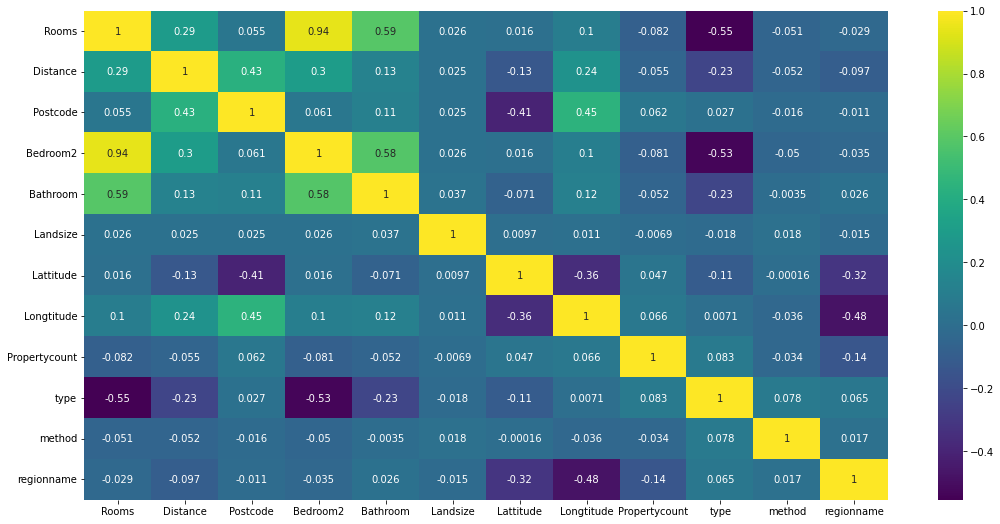

In [19]:
correlacion=X.corr()
plt.figure(figsize=(18,9))
sns.heatmap(correlacion, annot=True, cmap='viridis') 
plt.show()

Se eliminan los datos que presentan correlación y con ello se reduce la data

In [20]:
print(X[:0])
#print(X['Longtitude'].unique())
X=X.drop(columns=['Bedroom2','Bathroom','Longtitude','Lattitude'])

Empty DataFrame
Columns: [Rooms, Distance, Postcode, Bedroom2, Bathroom, Landsize, Lattitude, Longtitude, Propertycount, type, method, regionname]
Index: []


Se escalan los datos para aplicarle PCA

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xnew = np.array(X)
X_scal =scaler.fit_transform(Xnew)
pca3 = PCA(n_components = 8)
pca3.fit(X_scal)
Xpca = pca3.fit_transform(X_scal)

X2=Xpca
y2=y
print(np.shape(X))
print(np.shape(y))
print(type(X2))


(13580, 8)
(13580,)
<class 'numpy.ndarray'>


Modelo sin aplicarle PCA

El modelo elejido es regresión lineal

In [24]:
Xtrain2, Xtest2, ytrain2, ytest2=tts(X,y,test_size=0.3)
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score, mean_squared_error
modeLR=LR()
modeLR.fit(Xtrain2, ytrain2)
y_pr_train_LR= modeLR.predict(Xtrain2) 
y_pr_test_LR= modeLR.predict(Xtest2)

r2_LR_train= r2_score(ytrain2,y_pr_train_LR)
msetrain=mean_squared_error(ytrain2,y_pr_train_LR)
r2_LR_test =r2_score(ytest2,y_pr_test_LR)
msetest=mean_squared_error(ytest2,y_pr_test_LR)

print('_'*100)
print('            RESULTADO DE LAS MÉTRICAS PARA REGRESIÓN LINEAL SIN APLICAR PCA')
print('El R2_score en entrenamiento es     :', r2_LR_train)
print('El MSE en entrenamiento es          :', msetrain)
print('_'*60)
print('El R2_score en testeo es            :', r2_LR_test)
print('El MSE en testeo es                 :', msetest)
print('_'*60)

____________________________________________________________________________________________________
            RESULTADO DE LAS MÉTRICAS PARA REGRESIÓN LINEAL SIN APLICAR PCA
El R2_score en entrenamiento es     : 0.4647908881968298
El MSE en entrenamiento es          : 217892951786.4655
____________________________________________________________
El R2_score en testeo es            : 0.4683065905446223
El MSE en testeo es                 : 219229566394.07257
____________________________________________________________


Para aplicarle PCA se emplea el modelo de KNN

In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsRegressor as KNN
Xtrain3, Xtest3, ytrain3, ytest3=tts(X2,y2,test_size=0.4)

modelknn = KNN(n_neighbors=1)
modelknn.fit(Xtrain3,ytrain3)
y_pr_train_knn= modelknn.predict(Xtrain3) 
y_pr_test_knn= modelknn.predict(Xtest3)
score_knn_train= r2_score(ytrain3,y_pr_train_knn)
msetrainknn=mean_squared_error(ytrain3,y_pr_train_knn)
score_knn_test = r2_score(ytest3,y_pr_test_knn)
msetestknn=mean_squared_error(ytest3,y_pr_test_knn)
print('_'*100)
print('            RESULTADO DE LAS MÉTRICAS PARA KNN APLICANDO PCA')
print('El R2_score en entrenamiento es     :    ', score_knn_train)
print('El MSE en entrenamiento es          :', msetrainknn)
print('_'*60)
print('El R2_score en validacion es        :    ', score_knn_test)
print('El MSE en testeo es                 :', msetestknn)
print('_'*60)


____________________________________________________________________________________________________
            RESULTADO DE LAS MÉTRICAS PARA KNN APLICANDO PCA
El R2_score en entrenamiento es     :     0.9890367785880316
El MSE en entrenamiento es          : 4416831551.357142
____________________________________________________________
El R2_score en validacion es        :     0.4844108085064738
El MSE en testeo es                 : 215188594475.6504
____________________________________________________________


##TERCER EJERCICIO

In [23]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
import pandas as pd
vinos=pd.read_excel('/content/wine.xlsx')
print(vinos.head())

   Unnamed: 0 country  ...             variety                   winery
0           0      US  ...  Cabernet Sauvignon                    Heitz
1           1   Spain  ...       Tinta de Toro  Bodega Carmen Rodríguez
2           2      US  ...     Sauvignon Blanc                 Macauley
3           3      US  ...          Pinot Noir                    Ponzi
4           4  France  ...  Provence red blend     Domaine de la Bégude

[5 rows x 11 columns]


In [26]:
print(vinos[:0])
#print(vinos['price'].unique())
Xrf=vinos.drop(columns=['Unnamed: 0','description','designation','province','region_1','region_2','variety','winery','country','price'])
print(Xrf[:0])
yrf=vinos['price']
print(np.shape(Xrf))
print(np.shape(yrf))
print(Xrf.idxmax(axis=1, skipna=False))
print(Xrf.info())

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, variety, winery]
Index: []
Empty DataFrame
Columns: [points]
Index: []
(150930, 1)
(150930,)
0         points
1         points
2         points
3         points
4         points
           ...  
150925    points
150926    points
150927    points
150928    points
150929    points
Length: 150930, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   points  150930 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB
None


In [27]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data=np.array(vinos)

precio=vinos['price']
puntos=vinos['points']
precio1=np.array(precio)
puntos1=np.array(puntos)
encoder.fit(precio1)
encoder.fit(puntos1)

precioencoder=encoder.fit_transform(precio)
puntosencoder=encoder.fit_transform(puntos)

yrf['Price']=precioencoder
Xrf['Puntos']=puntosencoder
yrfr=yrf.drop(columns=['price'])
Xrfr=Xrf.drop(columns=['points'])
#yrf=np.reshape(yrf,(150931,1))
yrf=yrf.drop([150929],axis=0)
print(yrf[:0])
y5=yrf
X5=Xrf

print(np.shape(Xrfr))
print(np.shape(yrfr))
print(Xrf['Puntos'].unique())
#print(yrf['Price'].unique())
print(yrf['Price'])


Series([], Name: price, dtype: object)
(150930, 1)
(150931,)
[16 15 14 10 11  6  9  8  7 13 12  5  4  3  2  1 20 19 18 17  0]
[216 106  86 ...  16  48  11]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Xdta=scaler.fit_transform(np.array(X5))
print(Xdta)
Pca=PCA(n_components=2)
Pca.fit(Xdta)
Xpca=Pca.fit_transform(Xdta)
k_m2=KMeans(n_clusters=2)
k_m2.fit(Xdta)
label=k_m2.labels_

X6=Xpca
y6=label

[[0.8  0.8 ]
 [0.8  0.8 ]
 [0.8  0.8 ]
 ...
 [0.55 0.55]
 [0.5  0.5 ]
 [0.5  0.5 ]]


In [31]:

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error
Xtrain3,Xtest3,ytrain3,ytest3=tts(X6,y6,test_size=0.3)
modelRFR=RFR(n_estimators=200)
modelRFR.fit(Xtrain3, ytrain3)
y_pr_train_RFR= modelRFR.predict(Xtrain3) 
y_pr_test_RFR= modelRFR.predict(Xtest3)

r2_RFR_train= r2_score(ytrain3,y_pr_train_RFR)
msetrainRFR=mean_squared_error(ytrain3,y_pr_train_RFR)
r2_RFR_test =r2_score(ytest3,y_pr_test_RFR)
msetestRFR=mean_squared_error(ytest3,y_pr_test_RFR)

print('              RESULTADO DE LAS MÉTRICAS PARA RANDOM FOREST CON N=200')
print('El score en entrenamiento es        :    ', r2_RFR_train)
print('El MSE en entrenamiento es          :', msetrainRFR)
print('_'*60)
print('El score en validacion es           :    ', r2_RFR_test)
print('El MSE en entrenamiento es          :', msetestRFR)
print('_'*60)

              RESULTADO DE LAS MÉTRICAS PARA RANDOM FOREST CON N=200
El score en entrenamiento es        :     1.0
El MSE en entrenamiento es          : 0.0
____________________________________________________________
El score en validacion es           :     1.0
El MSE en entrenamiento es          : 0.0
____________________________________________________________


##CUARTO EJERCICIO

In [32]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
import pandas as pd
can=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
print(can.head())
print(can.describe())


         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]
                 id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e

In [33]:
from sklearn.preprocessing import LabelEncoder
y = np.array(can['diagnosis'])
encoder = LabelEncoder()
y=encoder.fit_transform(y)
y=np.reshape(y,(len(y),1))

In [34]:
X = can.drop(columns = ['id','diagnosis'])
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
X1 = np.array(X)
X2 = escalar.fit_transform(X1)
Xtrain,Xtest,ytrain,ytest = tts(X2,y,test_size=0.3)

In [35]:
import tensorflow as tf
Model = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(200,activation = 'relu'),
      tf.keras.layers.Dense(400,activation = 'relu'),
      tf.keras.layers.Dense(200,activation = 'relu'),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(25,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

Model.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

graficadata=Model.fit(Xtrain,ytrain,epochs = 500)

Epoch 1/500
13/13 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.6206
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.6206
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.6206
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6206
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6206
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.6206
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.6206
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6206
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.6206
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.6206
Epoch 11/

          RESULTADOS PARA EL MODELO
____________________________________________________________
Los resultados para el en entrenamiento son :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       247
           1       0.99      1.00      0.99       151

    accuracy                           0.99       398
   macro avg       0.99      1.00      0.99       398
weighted avg       1.00      0.99      0.99       398

Los resultados para el en testeo son :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.94      1.00      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171

____________________________________________________________
El recall de entrenamiento es: 1.0
El recall de testeo es: 1.0
________________________________________

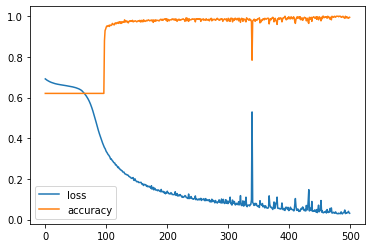

In [38]:
from sklearn.metrics import recall_score, confusion_matrix

ypredict_train = np.round(Model.predict(Xtrain),0)
ypredict_test = np.round(Model.predict(Xtest),0)
recall_test = recall_score(ytest,ypredict_test)
recall_train = recall_score(ytrain,ypredict_train)

results_train=classification_report(ytrain,ypredict_train)
results_test = classification_report(ytest,ypredict_test)
print('          RESULTADOS PARA EL MODELO')
print('_'*60)
print('Los resultados para el en entrenamiento son :')
print(results_train)
print('Los resultados para el en testeo son :')
print(results_test)
print('_'*60)
print('El recall de entrenamiento es:',recall_train)
print('El recall de testeo es:',recall_test)
print('_'*60)
print('La matriz de confusión de entrenamiento es')
print(confusion_matrix(ytrain,ypredict_train))
print('La matriz de confusión del testeo es')
print(confusion_matrix(ytest,ypredict_test))

#Se dibuja la función de costo después de aplicar el deep learning al modelo
pd.DataFrame(graficadata.history).plot()

##QUINTO EJERCICIO

In [67]:
"""
Crea una función que aplane la ruta de una imágen
"""
import numpy as np
import matplotlib.pyplot as plt
def data(ruta):
  imagen =plt.imread(ruta)
  plt.imshow(imagen)
  print(np.shape(imagen))
  return data

para ver una imagen debe escribir la ruta en la función y de la siguiente manera: 
data("ruta")
(224, 224, 3)


<function __main__.data>

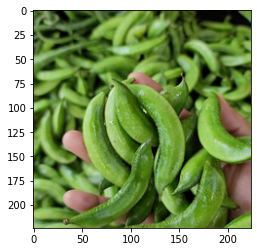

In [70]:
print('para ver una imagen debe escribir la ruta en la función y de la siguiente manera: ')
print('data("ruta")')
data("/content/0098.jpg")